In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_jpeg_files():
    os.getcwd()
    os.listdir()
    path = os.getcwd()  
    jpg_files = [f for f in os.listdir(path) if f.endswith('.jpg')]
    return jpg_files
get_jpeg_files()

['canakkale-gray.jpg',
 'canakkale-sehitleri-aniti.jpg',
 'einstein.jpg',
 'images.jpg',
 'letter.jpg',
 'letterA.jpg',
 'penguins.jpg']

In [4]:
def display_two_image(im_1,im_2):
    plt.subplot(1,2,1), plt.imshow(im_1)
    plt.subplot(1,2,2),plt.imshow(im_2) #resmin tüm pixel yoğunluklarını +30
    plt.show()
def rotate_by_i_j_swap(im_1):
    m,n,k = im_1.shape
    new_image = np.zeros((n,m,k),dtype='uint8')
    
    for i in range(m):
        for j in range(n):
            temp = im_1[i,j]
            new_image[j,i] = temp
    return new_image

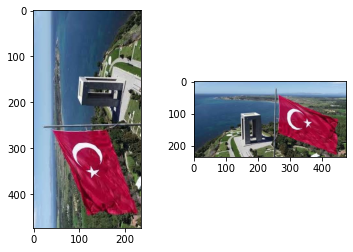

In [5]:
image_1 = plt.imread('canakkale-sehitleri-aniti.jpg')
im_2 = rotate_by_i_j_swap(image_1)
im_3 = rotate_by_i_j_swap(im_2)

display_two_image(im_2, im_3)

In [7]:
def rotate_one_point_with_theta_counterclockwise(point, angle):
    theta = np.radians(angle)
    r = np.array(( (np.cos(theta), -np.sin(theta)),
                 (np.sin(theta), np.cos(theta)) ))
    v = np.array(point)
    
    return r.dot(v).astype(int)
def get_all_new_location(im_1, angle):
    m,n,k = im_1.shape
    new_location_points = []
    for i in range(m):
        for j in range(n):
            new_location_points.append(rotate_one_point_with_theta_counterclockwise([i,j],angle))
    return new_location_points
def get_min_max(new_location_points):
    min_x, min_y = new_location_points[0][0], new_location_points[0][1]
    max_x, max_y = new_location_points[0][0], new_location_points[0][1]
    
    s1 = len(new_location_points)
    for s in range(s1):
        if min_x>new_location_points[s][0]:
            min_x = new_location_points[s][0]
        if min_x<new_location_points[s][0]:
            max_x = new_location_points[s][0]
        if min_y>new_location_points[s][1]:
            min_y = new_location_points[s][1]
        if max_y<new_location_points[s][1]:
            max_y = new_location_points[s][1]
        
    return min_x, min_y, max_x, max_y
            

In [8]:
new_location_points = get_all_new_location((image_1),90)
min_x, min_y, max_x, max_y = get_min_max(new_location_points)
rotate_one_point_with_theta_counterclockwise([0,1], 90)

array([-1,  0])

In [10]:
def rotate_an_image(im_1, angle):
    m,n,k = im_1.shape
    new_location_points = get_all_new_location(im_1, angle)

    min_x, min_y, max_x, max_y = get_min_max(new_location_points)

    new_m = max_x-min_x+1
    new_n = max_y-min_y+1

    x_offset = 0-min_x
    y_offset = 0-min_y


    new_image_2 = np.zeros((new_m,new_n,3), dtype='uint8')

    for i in range(m):
        for j in range(n):
            new_i,new_j = rotate_one_point_with_theta_counterclockwise([i,j], angle)
            new_image_2[new_i+x_offset, new_j+y_offset] = image_1[i,j]
            
    return new_image_2

    

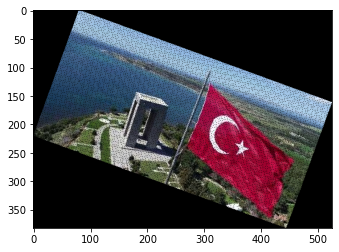

In [12]:
i_1 = rotate_an_image(image_1, -20)
plt.imshow(i_1)
plt.show()